## Diplomatura Data Science Aplicada 


---




## Modulo 5 - Procesamiento de lenguaje natural


---



### Objetivo

Este proyecto tiene como objetivo analizar un conjunto de datos de la plataforma Yelp y generar un modelo de machine learning, el cual, recibirá una review de un usuario y deberá ser capaz de determinar si ésta es, positiva o negativa.


### Las features que contiene el dataset son las siguientes:
				
* business_id: identificador del negocio al que se está realizando la review.
*  cool: cantidad de votos por haber sido una review “cool”.
*  date: fecha de realización de la revisión
*  funny: cantidad de votos para una revisión “divertida”.
*  review_id: identificador único de revisión (ofuscado).
*  stars: cantidad de estrellas otorgadas por el usuario en referencia a la review.
*  text: revisión realizada por el usuario sobre un determinado negocio.
*  useful: cantidad de votos recibido por los usuarios a los cuales le resultó útil la revisión.
* user_id: id del usuario en la plataforma (ofuscado)



### Importar Librerias

In [ ]:
pip install sklearn

In [ ]:
!pip install nltk==3.4

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436396 sha256=13c2cafde8111d3b4418708d396b7b36d6bf083a9d900536eee270d0498e898a
  Stored in directory: /root/.cache/pip/wheels/13/b8/81/2349be11dd144dc7b68ab983b58cd2fae353cdc50bbdeb09d0
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install  unidecode

     |████████████████████████████████| 235 kB 5.3 MB/s 


In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 5.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=25d0cfe54679c9c969d26a2948f46b6b4b30223fcaa7ae9cb5afb3da86245712
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install itranslate

     |████████████████████████████████| 76 kB 3.3 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 78 kB 5.5 MB/s 


In [ ]:
!pip3 install keras-visualizer

In [ ]:
# BASICAS
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from tabulate import tabulate

In [ ]:
# VISUALIZACIONES DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
import plotly.figure_factory as ff
import collections
from collections import Counter
from PIL import Image
# GRAFICOS (extras) 
import matplotlib.cm as cm 
from matplotlib import rcParams

In [ ]:
# NLTK 
from unidecode import unidecode
import re, string, unicodedata # Manejo de Expresiones Regulares, Operaciones de cadenas de caracteres no numericos
import nltk # Procesamiento del lenguaje natural 
import inflect
from nltk import word_tokenize
nltk.download("stopwords") # Quitar palabras comunes
from nltk.corpus import stopwords # Eliminar palabras vacias 
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk.tokenize import WhitespaceTokenizer # Tokenizar 
# TRATAMIENTO DE TEXTO
from wordcloud import WordCloud # Nube de palabras
from textblob import TextBlob # Procesamiento del lenguaje
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('punkt')
# TRADUCCION DE TEXTO
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0
from itranslate import itranslate as itrans
from nltk import pos_tag # Clasificacion de palabras
nltk.download('averaged_perceptron_tagger') # Etiquetar las palabras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# SKLEARN
from sklearn.pipeline import make_pipeline
from sklearn import datasets, linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Codificacion de documentos, segun frecuenca de las palabras
from sklearn.model_selection import train_test_split # Dividir los datos en entrenamiento y validacion
from sklearn.linear_model import LogisticRegression # Clasificador
from sklearn.metrics import classification_report # Metricas para valoracion del modelo
from sklearn.metrics import f1_score, confusion_matrix # Metricas para valoracion del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score # Metricas para valoracion del modelo
from sklearn.metrics import plot_confusion_matrix # Metricas para valoracion del modelo
from sklearn.model_selection import GridSearchCV # Ajuste de hiper-parametros
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier 
            
import pickle # Guardar modelo

# ADICIONALES
import warnings # Control de advertencias
warnings.filterwarnings('ignore')
from tqdm import tqdm 
tqdm.pandas(desc='Processing Dataframe') # Barra de progreso

In [ ]:
# Redes Neuronales
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras_visualizer import visualizer
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences
from keras import layers



### Importar Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!head /content/drive/MyDrive/reviews_yelp_nn.csv

business_id	cool	date	funny	review_id	stars	text	useful	user_id
EhGPj8iJDIdaHnWg9d5BgA	0	2016-04-20 14:30:53	0.0	uJRdHLz4XNmDK5pOkWbZNA	5.0	Best Dim Sum in the city, their cart service is great and offer big selection of quality dim sum.  You can order off the menu too if there is something you haven't seen come around.  It is a little more expensive but you can't beat it, and the view is perfect for a weekend brunch.	0.0	POETn3fQcZ8ngLAARCATSg
VPcFNI-6HICR5SJM--KjNA	5	2013-05-14 03:08:12	2.0	TlPh8jy8bt_TSGfjEw-pvA	5.0	"How... HOW did I not head down here sooner? For real. When Yelpers say there's a Calgary establishment and I need to drive halfway across town to get to it, I need to get my ass in my car and go. 

Bill's. Where has your ginger beef been all my life? What's that? Right in your kitchen, served on your tables, mouths and mouths before me having devoured it's gingery and crunchy goodness while I went without even though I knew better... the reviews told me better.

I am a 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/reviews_yelp_nn.csv',sep='\t')  #noe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DiploCD/reviews_yelp_nn.csv',sep='\t') #Caro

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/UTN Córdoba/Módulo 5/reviews_yelp_nn.csv', sep='\t', error_bad_lines=False) #Ceci

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/reviews_yelp_nn.csv',sep='\t') #agus

In [ ]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.000,uJRdHLz4XNmDK5pOkWbZNA,5.000,"Best Dim Sum in the city, their cart service i...",0.000,POETn3fQcZ8ngLAARCATSg
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.000,TlPh8jy8bt_TSGfjEw-pvA,5.000,How... HOW did I not head down here sooner? Fo...,7.000,oUK6Xs5dPPnP4whFeZExGg
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.000,GmoBAVE1pTo0kjmeKrXmLQ,4.000,Carnitas were wonderful. First time there and ...,0.000,SiaSUNlKQK7f57WBPmyyNw
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.000,ZHuM9P81zfuNuFZ5ThXNRg,5.000,Great staff who are always willing to help. I ...,0.000,PsH5Qi8R69WAlhNv8mXWRA
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.000,-2Ce00mfWYP20yt7k6kARg,3.000,"This place is bigger, brighter, new so it's cl...",3.000,r-zUIQPaHzvIyL93wQaoiQ


----------------
### Identificacion de Reviews en otro idioma

Luego de realizar el tratamiento de nulos y la limpieza de la columna texto, se evaluará si conviene eliminar esos comentarios ó realizar una función para traducirlos al Inglés, en proporción a la cantidad que representen dichos comentarios, sobre el total de la muestra. 



In [ ]:
df[990434:990438]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
990434,QMaaLfedGzNhHz6PZKAUkw,0,2018-11-02 16:06:48,0.000,FnVtpzXJqnkbr-POT8w6WQ,1.000,ordered a bacon breakfast burrito....got few l...,0.000,dTuihqKILKXqZPC7TP5quw
990435,-92cC6-X87HQ1DE1UHOx3w,0,2016-06-12 03:10:10,0.000,n7gqM8NjCJ9iDw46AvjR5w,5.000,鮭魚料理很讚，份量也很多，一定要嘗試!!桌上的調味料也很好吃。餐廳很有氣氛!!下次會帶朋友一...,0.000,lhwMv7mirm39EECh1mYAPw
990436,-hsFN8VQvH26M0WZ3k1Wtg,0,2015-09-18 02:42:47,0.000,BAlnCM2iQ5B-1_CeJTpJ1Q,5.000,The only place I would stay at in Vegas!! I've...,0.000,p7ugO5lotkndKXjk8ZTOTQ
990437,VyVIneSU7XAWgMBllI6LnQ,0,2017-02-01 02:46:48,0.000,MNrIRVl6uR6-8x0zhyPZqQ,5.000,Good stuff and priced well. I would definitely...,0.000,XPi5j3f1s2ASm-FP_Dp6ng


In [ ]:
df_no_english = df[(df.user_id =='lhwMv7mirm39EECh1mYAPw') ^ (df.user_id =='z9w399cBpCAKXhH_JA1AtQ') ^ (df.user_id =='nlfycrCBM6FxnP5wIN01SQ') ^ (df.user_id =='nbaaLwkb3WkvJa7jqTu98g')]
df_no_english.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
29508,7p54EUi6PylEtmSyMdIstA,0,2018-09-08 19:31:03,1.000,GPQ6fi6rynWqTjRf4y8MJg,3.000,位于midland and finch的金钟城内，转角位的店铺。晚上气氛几好，楼底高配搭了特...,0.000,z9w399cBpCAKXhH_JA1AtQ
30208,NsKmhcG6arDhTqDVKXIv6g,0,2017-07-25 21:54:59,0.000,eNFzC2k1lSz2eMhMA3msUA,3.000,位於Empress Walk內的負一層全層。痴住north york centre地鐵站。如...,0.000,z9w399cBpCAKXhH_JA1AtQ
51668,tCYknqUdD-4TnEn8RtxBjw,0,2017-09-17 02:59:41,0.000,msZr94kwsyJ7yfVLw5JOwg,3.000,"好耐无吃subway ,突然想吃。逛完超市就去了隔离间subway买6inch包吃。呢间su...",0.000,z9w399cBpCAKXhH_JA1AtQ
59160,GTwQgfi8DN23D9fMURYUdw,0,2017-11-27 18:22:09,0.000,ntkygQThK3-ossVcaDNp_Q,3.000,门面几大，如店名般寿司和bar结合，一次满足两种不同类别要求的客人。周末下午时分看似冷清，其...,1.000,z9w399cBpCAKXhH_JA1AtQ
99893,6f2imTsIysASgHh2t91OOQ,0,2018-01-01 00:56:41,0.000,UgBPZzQFinB1buagRsn-7w,5.000,必须推荐海胆，非常新鲜，而且肥美鲜甜！海胆配蚝，简直完美到不得了，fanny bay的蚝虽然...,1.000,z9w399cBpCAKXhH_JA1AtQ


In [ ]:
print("df_no_english.shape :", df_no_english.shape)

df_no_english.shape : (164, 9)


In [ ]:
# Es una prueba con algunas de las filas en otro idioma para ver si funciona
# despues habria que generalizarlo a toda la columna
averiguar_idioma = []
averiguar_idioma.append(df.loc[990435]['text'])
averiguar_idioma.append(df.loc[477719]['text'])
averiguar_idioma.append(df.loc[29508]['text'])
averiguar_idioma.append(df.loc[30208]['text'])
averiguar_idioma.append(df.loc[3340511]['text'])
averiguar_idioma.append(df.loc[672128]['text'])
averiguar_idioma

['鮭魚料理很讚，份量也很多，一定要嘗試!!桌上的調味料也很好吃。餐廳很有氣氛!!下次會帶朋友一起來!!附近環境很清幽，窗外望出去一片青綠，非常喜歡。',
 '鹹酥雞，炒飯，爌肉飯，都是很道地的中式餐點，而且還可以配上一杯珍珠奶茶，用完餐還可以外帶麵包回家，早餐不用愁\n值得您來品嚐',
 '位于midland and finch的金钟城内，转角位的店铺。晚上气氛几好，楼底高配搭了特色球形灯饰，靠一边的玻璃墙位设置为半环形的卡座，好适合一班朋友聚餐倾计。餐牌方面图文并茂，选择都系以芒果类为主的甜点，少量传统糖水和主食。芒果班戟卖相有吸引性，拌碟的装饰有心思，味道就中规中矩，唔算好特别。整体离讲，环境系唔错，出品叫做ok,性价比唔算高',
 '位於Empress Walk內的負一層全層。痴住north york centre地鐵站。如果由地面落去的話，系商場中間行弯曲樓梯落去，好特別。地方都ok大，水果區剛好係商場中空位置，由上往下望落个超市好吸引甘。收銀出口位有tim horton，可以歇腳',
 '分店众多的Town shoes肯定系大Mall必有一店，位于Vaughan Mills商场内经过简单装修，同以前有少少不同。门口仍然摆放当季或热卖货品。店里面一排排的鞋柜是特价品，根据码数分类好，男女、咩季节、场合都有。大多数是断码，幸运的话，可能2折价钱买到大牌鞋tim',
 "Menudo is only on Saturday and Monday. It's delicious. A little bit chilly hot for me but is acceptable. Servings huge, adequate price."]

In [ ]:
idiomas = [detect(elm) for elm in averiguar_idioma]
idiomas

['zh-tw', 'ko', 'zh-cn', 'zh-tw', 'zh-cn', 'en']

In [ ]:
traducciones = [itrans(elm, to_lang="en") for elm in averiguar_idioma]
traducciones

['The salmon is very good, there are many parts, must try !! The seasonings on the table are also delicious. The restaurant is very atmosphere!! Next time I will bring a friend !! Nearby environments are very quiet, and they are looking for green and green, very like.',
 'Salty cricket, fried rice, smear rice, all the Chinese-style meals, but also with a glass of pearl milk tea, you can also take a loaf of bread with a breakfast, breakfast \n Good to taste',
 'The store in Midland and Finch, the corner of the corner. The atmosphere is a good atmosphere, the floor is high with special spherical lighting, and the glass wall is set as a semi-ring-shaped card seat, so good for a group of friends. The menu is graphic and the choice is a dessert based on mango, a small amount of traditional sugar and staple food. The mango class is attractive, the decoration of the mixed saucer has a thought, the taste is in the middle, and it is very good. Overall, the environment is wrong, the product is c

------------------------------------------

## EDA

In [ ]:
print("El conjunto da datos a analisar tiene un total de {} columnas y {} registros".format(df.shape[1], df.shape[0]))

El conjunto da datos a analisar tiene un total de 9 columnas y 3342958 registros


In [ ]:
print('\033[1m'+'Numero Total de valores missing en el DataSet:'+'\033[0m',df.isnull().sum().sum())
print('\033[1m'+'Numero Total de valores unicos en el DataSet:'+'\033[0m',df.nunique().sum())
print('\033[1m'+'Numero Total de valores no nulos en el DataSet:'+'\033[0m',df.count().sum())
print('\033[1m'+'Numero Total de registros duplicados en el DataSet:'+'\033[0m',df.duplicated().sum())

Numero Total de valores missing en el DataSet: 73
Numero Total de valores unicos en el DataSet: 11293007
Numero Total de valores no nulos en el DataSet: 30086549
Numero Total de registros duplicados en el DataSet: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342958 entries, 0 to 3342957
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   cool         object 
 2   date         object 
 3   funny        float64
 4   review_id    object 
 5   stars        float64
 6   text         object 
 7   useful       float64
 8   user_id      object 
dtypes: float64(3), object(6)
memory usage: 229.5+ MB


In [ ]:
df.cool = pd.to_numeric(df.cool, errors='coerce') # para forzar valores no válidos a NaN 

Se eliminan las columnas date, business_id,	review_id y	user_id porque no aportan información para el analisis bajo estudio

In [ ]:
df = df.drop(columns = ['date','business_id','review_id','user_id'], axis=1)

In [ ]:
df.isna().sum()

cool       5
funny      9
stars      9
text      10
useful    14
dtype: int64

In [ ]:
df.isnull().any().any()

True

Podemos identificar que existen algunos datos nulos en la columna text y como el análisis debe realizarse utilizando los reviews de las personas, una línea sin un review es inservible, por lo tanto procedemos a eliminarlos

In [ ]:
for text in df:
    if df[text].dtype == "object":
        df[text] = df[text].fillna("None")
    else: 
        df[text] = df[text].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342958 entries, 0 to 3342957
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   cool    float64
 1   funny   float64
 2   stars   float64
 3   text    object 
 4   useful  float64
dtypes: float64(4), object(1)
memory usage: 127.5+ MB


In [ ]:
# Función para observar el porcentaje de nans que tiene cada columna
def nans_percentage(pf):
  null_values=pf.isnull().sum()
  null_values=pd.DataFrame(null_values,columns=['null'])
  j=1
  sum_tot=len(pf)
  null_values['percent']=null_values['null']/sum_tot
  
  return round(null_values*100,3).sort_values('percent',ascending=False)

In [ ]:
nans_percentage(df)

,null,percent
cool,0,0.000
funny,0,0.000
stars,0,0.000
text,0,0.000
useful,0,0.000


Dado que son pocos los valores nulos por cada columna y, por ende representan un muy bajo porcentaje sobre el total, se procede a eliminarlos

In [ ]:
#df = df.dropna(subset=['cool', 'date', 'funny', 'review_id', 'text', 'useful', 'user_id'])
df = df.dropna(subset=['cool', 'funny', 'text', 'useful'])

In [ ]:
df = df.astype({'stars': 'int','funny': 'int','useful': 'int','cool': 'int'})

In [ ]:
df.describe()

,cool,funny,stars,useful
count,3342958.000,3342958.000,3342958.000,3342958.000
mean,0.577,0.481,3.716,1.352
std,2.352,2.341,1.464,3.646
min,-1.000,0.000,0.000,-1.000
25%,0.000,0.000,3.000,0.000
50%,0.000,0.000,4.000,0.000
75%,0.000,0.000,5.000,2.000
max,506.000,970.000,5.000,1122.000


Para las columnas de votos, hay 2 comentarios que tienen -1 voto (cool y useful), esos podrian ser outliers y ver en los valores max, si se podria considerar alguno como outliers?

In [ ]:
df[df.useful == 1122]

,cool,funny,stars,text,useful
2989942,506,628,1,"In retrospect, I should have known better than...",1122


In [ ]:
df[df.funny == 970]

,cool,funny,stars,text,useful
1162786,43,970,5,I refuse to judge a place before I try it and ...,92


In [ ]:
df.isnull().sum()

cool      0
funny     0
stars     0
text      0
useful    0
dtype: int64

## Relación entre la cantidad de Estrellas y las Reviews

In [ ]:
df.drop(df[df["stars"] == 0].index,inplace=True)

In [ ]:
temp = df.groupby('stars').count()['text'].reset_index().sort_values(by='stars',ascending=True)
temp

,stars,text
0,1,501156
1,2,271259
2,3,369404
3,4,733911
4,5,1467219


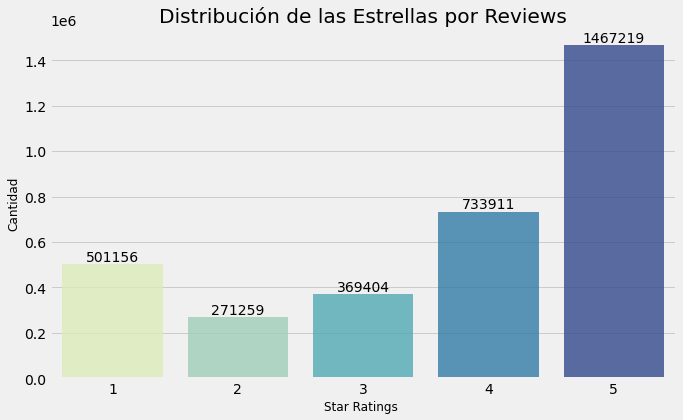

In [ ]:
x=df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8, palette = 'YlGnBu')
plt.title("Distribución de las Estrellas por Reviews")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


En este gráfico podemos ver como se distribuyen las calificaciones por estrellas y utilizar esas calificaciones, para obtener una etiqueta que indique "positivo" o "negativo". 

Basado en dicha distribución, claramente se observa una mayor cantidad de revisiones con el número máximo de estrellas (5) y se infiere que: 
- Las reviews con 1, 2 y 3 estrellas, podrían considerarse negativas 
- Las reviews con 4 y 5 estrellas, podrían considerarse positivas

Es importante comprender la distribución de esta variable, ya que, al encontrarnos con un desequilibrio entre las estrellas recibidas, ésto influirá en los resultados del modelo, dando la propensión a predecir los resultados que están más presentes en el conjunto de entrenamiento.

## Relación entre la cantidad de Estrellas y la duración de las Reviews

Análisaremos si existe alguna correlación entre las estrellas y
* Cantidad de **palabras** 
* Cantidad de **caracteres** 

In [ ]:
# Creamos dos nuevas columnas en el dataset para calcular el numero de palabras y de caracteres en c/review

# Añadir número de palabras
df["palabras_len"] = df["text"].progress_apply(lambda x: len(x.split(" ")))

# Añadir número de caracteres
df["caracteres_len"] = df["text"].progress_apply(lambda x: len(x))

Processing Dataframe: 100%|██████████| 3342949/3342949 [00:05<00:00, 639526.25it/s]


In [ ]:
df.head(2)

,cool,funny,stars,text,useful,palabras_len,caracteres_len
0,0,0,5,"Best Dim Sum in the city, their cart service i...",0,57,281
1,5,2,5,How... HOW did I not head down here sooner? Fo...,7,287,1546


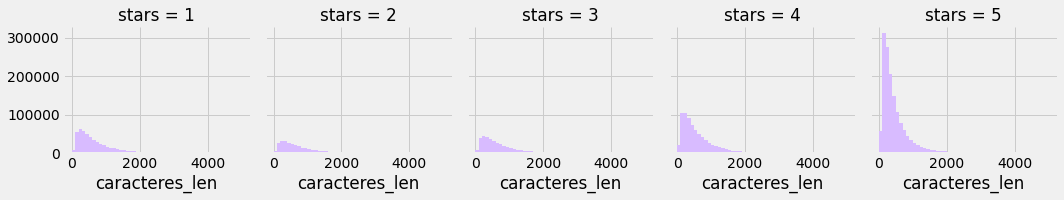

In [ ]:
# Comparando la cantidad de caracteres de cada reviews, con la cant de estrellas 
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'caracteres_len',bins=50,color="#D8BBFF")

En este gráfico podemos observar que en general, la distribución de la cantidad de caracteres es similar en las cinco clasificaciones. Pero como sabemos que la cantidad de reseñas de texto, esta más sesgada hacia las calificaciones de 4 y 5 estrellas y que se esta trabajando con un gran volumen de datos, se optará por hacer un analisis más especifico, en función de la cantidad de palabras.

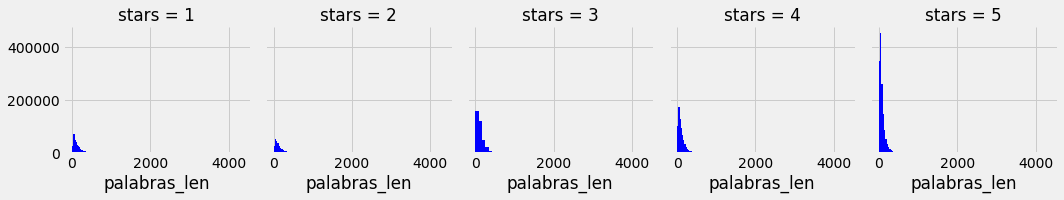

In [ ]:
# Comparando la cantidad de palabras de cada reviews, con la cant de estrellas 
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'palabras_len',bins=50,color="blue")

La distribución de la longitud del texto, tambien se mantiene en forma similar en las cinco clasificaciones. Sin embargo, para poder visualizarlas mejor, pocederemos a agrupar estas 5 categorias en 2 gráficos diferentes: 
* En el primer gráfico, se muestran los comentarios con 3 estrellas ó menos 
* En el segundo gráfico se muestran los comentarios con 4 y 5 estrellas

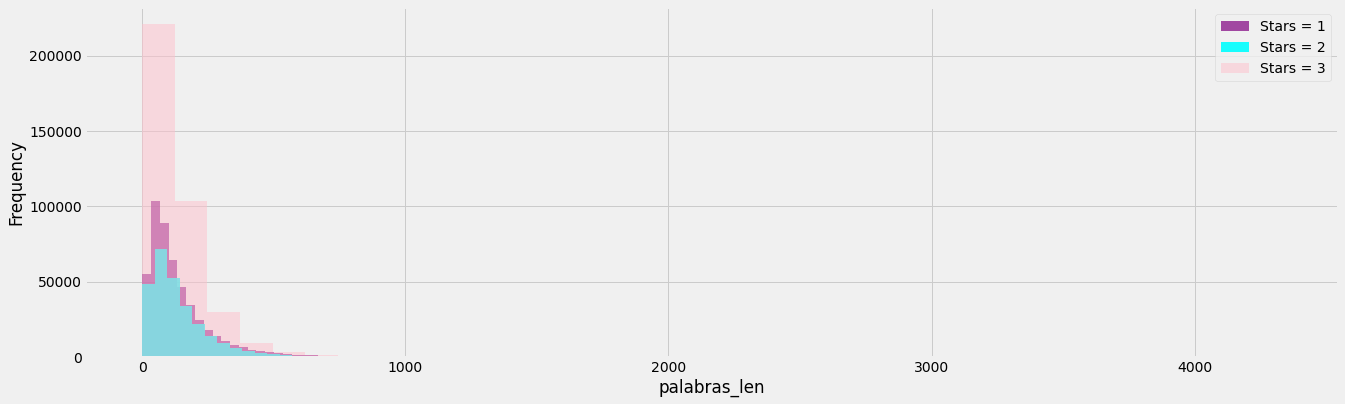

In [ ]:
plt.figure(figsize=(20,6))
df[df['stars']==1]['palabras_len'].plot(bins=35,alpha=0.7,kind='hist',color='purple',label='Stars = 1')
df[df['stars']==2]['palabras_len'].plot(bins=35,alpha=0.9,kind='hist',color='cyan',label='Stars = 2')
df[df['stars']==3]['palabras_len'].plot(bins=35,alpha=0.5,kind='hist',color='pink',label='Stars = 3')
plt.legend()
plt.xlabel('palabras_len')
plt.show()

En esta imagen podemos observar que: 
* La mayoria de los comentarios calificados con 1 y 2 estellas, tienen aproximadamente la misma cantidad de palabras
* En los comentarios calificados con 3 estrellas, hay un leve aumento en la cantidad de palabras (comparados con los anteriores) 

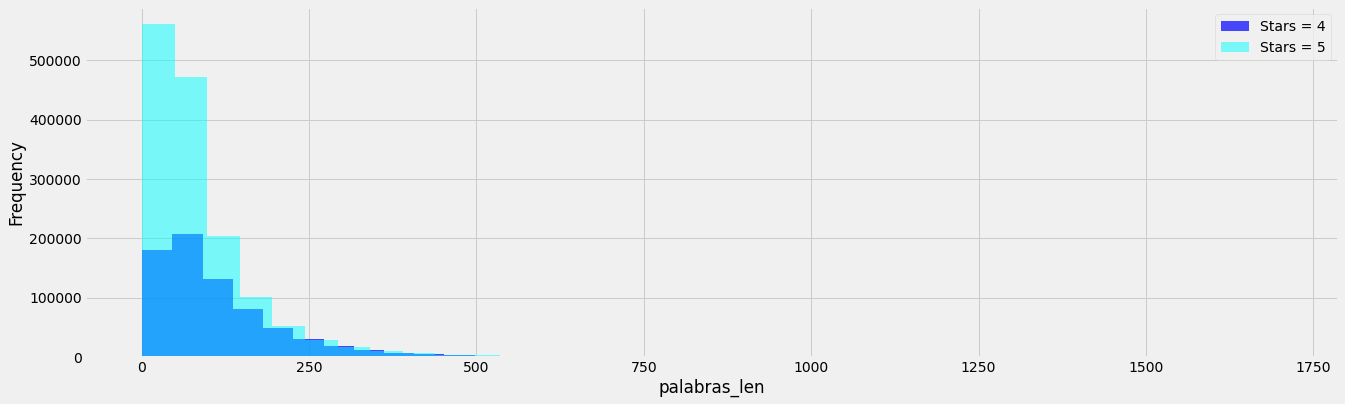

In [ ]:
plt.figure(figsize=(20,6))
df[df['stars']==4]['palabras_len'].plot(bins=35,alpha=0.7,kind='hist',color='blue',label='Stars = 4')
df[df['stars']==5]['palabras_len'].plot(bins=35,alpha=0.5,kind='hist',color='cyan',label='Stars = 5')
plt.legend()
plt.xlabel('palabras_len')
plt.show()

Claramente, podemos observar que la distribucion entre las clasificaciones de 4 y 5 estrellas, sigue el mismo patrón, y si comparamos este gráfico con el anterior, podemos inferir que a medida que aumenta la calificación, la duración de las reseñas disminuye. 

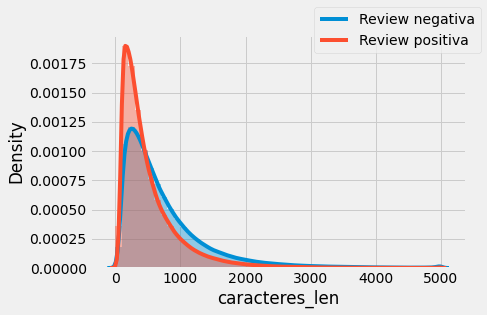

In [ ]:
# Para el número de caracteres
fig = plt.figure(figsize=(6,4))
plt1 = sns.distplot(df[df["stars"]<=3].caracteres_len, hist=True)
plt2 = sns.distplot(df[df["stars"]>3].caracteres_len, hist=True)
fig.legend(labels=['Review negativa','Review positiva'])
plt.show()


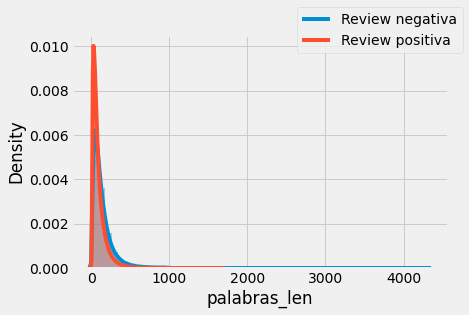

In [ ]:
# Para el número de palabras
fig = plt.figure(figsize=(6,4))
plt1 = sns.distplot(df[df["stars"]<=3].palabras_len, hist=True)
plt2 = sns.distplot(df[df["stars"]>3].palabras_len, hist=True)
fig.legend(labels=['Review negativa','Review positiva'])
plt.show()

Por todo lo expresado, podemos concluir que ambos grupos muestran una tendencia similar:
* Las reseñas con calificación 1 a 3, al ser más detalladas, podrían ser consideradas como las críticas, quejas y/o sugerencias. 
* Las reseñas con calificaciones de 4 y 5 estrellas, al ser más breves, podrían ser consideradas como un agradecimiento ó algo positivo.

## Determinación de Reviews positivas y negativas

A partir de ahora, podemos considerar la variable **STARS** como nuestra **variable objetivo** ó **target**, pero para poder obtener resultados útiles, es necesario reducir la complejidad del problema. 
Evaluando los diferentes casos de uso, podemos agruparla de la siguiente manera:

•	Positivos (4 y 5 estrellas) y Negativos (1 a 3 estrellas)

•	Positivos (4 y 5 estrellas) y Negativos (1 y 2 estrellas), se filtran los registros que tengan 3 estrellas, por considerarse las revisiones neutrales
 
•	Conjunto de datos multiclase, sin ningún agrupamiento por cantidad de estrellas y filtrando los registros en función de la cantidad de votos  


En primera instancia trabajaremos con el primer conjunto de clasificacion binaria, donde se crearan las siguientes categorias:

Se la asigna -> 1 a las Reviews consideradas positivas

Se le asigna -> 0 a las Reviews consideradas negativas


In [ ]:
def classify_Stars(rate):
    if rate < 3:
        return 'Negativo'
    elif rate == 3:
        return 'Negativo'
    else:
        return 'Positivo'

In [ ]:
df['ReviewType_1'] = df['stars'].apply(lambda rate: classify_Stars(rate))

In [ ]:
def classify_Stars2(rate):
    if rate < 3:
        return 0
    elif rate == 3:
        return 0
    else:
        return 1

In [ ]:
df['ReviewType_2'] = df['stars'].apply(lambda rate: classify_Stars2(rate))

In [ ]:
df[['ReviewType_1','ReviewType_2']]

,ReviewType_1,ReviewType_2
0,Positivo,1
1,Positivo,1
2,Positivo,1
3,Positivo,1
4,Negativo,0
...,...,...
3342953,Negativo,0
3342954,Positivo,1
3342955,Positivo,1
3342956,Negativo,0


In [ ]:
Positivos = df[df.ReviewType_1 == 'Positivo'].shape[0]
Negativos = df[df.ReviewType_1 == 'Negativo'].shape[0]
print ('Review Positiva:',Positivos)
print ('Review Negativa:',Negativos)

Review Positiva: 2201130
Review Negativa: 1141819


In [ ]:
print("El df tiene un conjunto de {} opiniones consideradas negativas y un conjunto de {} opiniones consideradas positivas".format(df["ReviewType_1"].value_counts()[1], df["ReviewType_1"].value_counts()[0]))
print("En porcentaje, el {0:.2f}% de las reviews son negativas y el {1:.2f}% de las reviews son positivas".format(df["ReviewType_1"].value_counts(normalize=True)[1]*100, df["ReviewType_1"].value_counts(normalize=True)[0]*100))

El df tiene un conjunto de 1141819 opiniones consideradas negativas y un conjunto de 2201130 opiniones consideradas positivas
En porcentaje, el 34.16% de las reviews son negativas y el 65.84% de las reviews son positivas


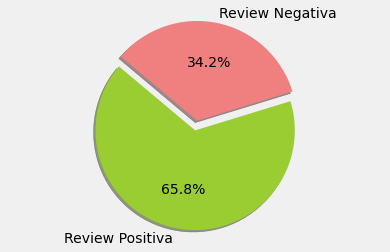

In [ ]:
# Positivos & Negativos

labels = 'Review Positiva', 'Review Negativa'
sizes = [Positivos, Negativos]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

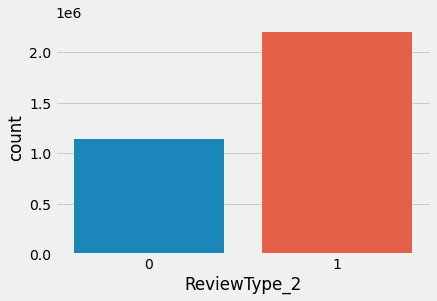

In [ ]:
sns.countplot(df['ReviewType_2'])   

ReviewType_1
Negativo   140.534
Positivo    97.998
Name: palabras_len, dtype: float64

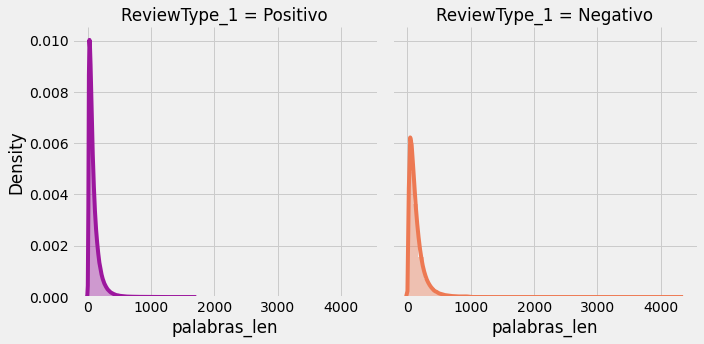

In [ ]:
a  =  sns.FacetGrid ( data  =  df ,  col  =  'ReviewType_1' ,  hue  =  'ReviewType_1' ,  palette = 'plasma' ,  size = 5 ) 
a.map (sns.distplot,  "palabras_len" ) 
df.groupby ( 'ReviewType_1' ).mean()['palabras_len']

Por ultimo, y como venimos remarcando desde el comienzo del análisis en función con la longitud de las reviews, observamos que las personas que tienden a calificar un lugar negativamente, tienen en promedio **140** palabras en sus reseñas, mientras que las personas que evalúan un lugar con un comentario positivo, tienen un promedio de **98** palabras en sus reseñas.

### Las 20 palabras principales y su frecuencia

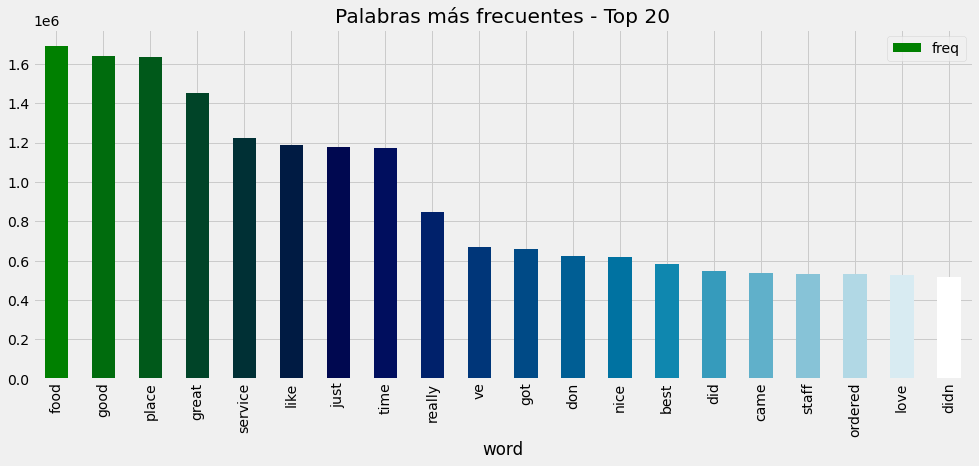

In [ ]:
# Palabras mas importantes ó de mas sentido SIN stopwords 
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Palabras más frecuentes - Top 20")
plt.show()

El gráfico de barras anterior representa las palabras más frecuentes en las reseñas para que podamos tener una idea aproximada de las opiniones de los usuarios sobre los distintos lugares nocturnos, espacios culturales, locales comerciales, entre otros.

Podemos ver que **food** es la palabra más frecuente. Otras palabras frecuentes son **good, place y great**, lo cual, podría sugerir que la mayoría de los usuarios que hicieron comentarios relacionados con negocios donde se ofrece comida, estan conformes con esos lugares y sus comentarios son favorables.

### Generación de nube de palabras para las palabras más frecuentes



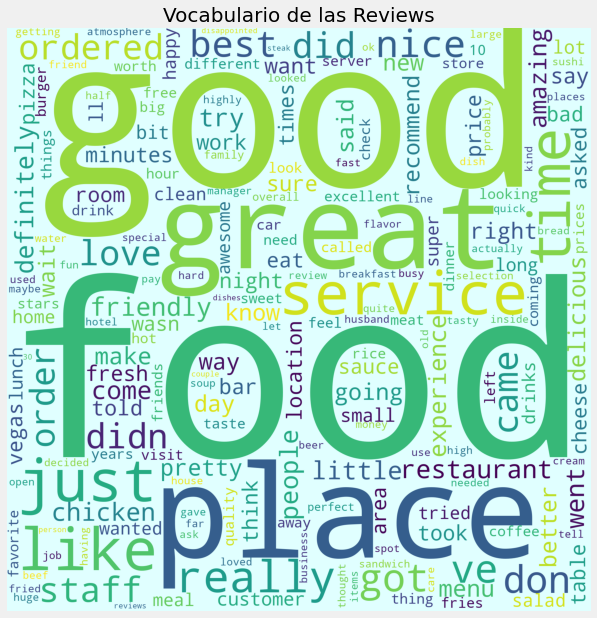

In [ ]:
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))   
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulario de las Reviews", fontsize = 20)
plt.show()

Este plot, nos permite mostrar a modo de "nube de palabras" las palabras más usadas en la columna de reviews. Cuanto más grandes sea el trazo de las palabras, mayor será su frecuencia. 

### Palabras más usadas, según la Cantidad de Estrellas

In [ ]:
stars_1= df[df.stars==1] 
stars_2= df[df.stars==2] 
stars_3= df[df.stars==3] 
stars_4= df[df.stars==4] 
stars_5= df[df.stars==5] 

In [ ]:
stars_1.head()

,cool,funny,stars,text,useful,ReviewType_1,ReviewType_2
13,0,0,1,What a complete disappointment! I went for lun...,1,Negativo,0
15,0,0,1,I was in this store very recently. It's very s...,0,Negativo,0
19,2,2,1,It's no longer called Soups and Noodles. It's ...,2,Negativo,0
21,0,1,1,Service here is horrible. They didn't page us ...,0,Negativo,0
25,0,0,1,I have to say I've lived across the street for...,1,Negativo,0


In [ ]:
graf_stars_1= stars_1.iloc[:,2:4]
graf_stars_1.head(5)

,stars,text
13,1,What a complete disappointment! I went for lun...
15,1,I was in this store very recently. It's very s...
19,1,It's no longer called Soups and Noodles. It's ...
21,1,Service here is horrible. They didn't page us ...
25,1,I have to say I've lived across the street for...


In [ ]:
graf_stars_2= stars_2.iloc[:,2:4]
graf_stars_3= stars_3.iloc[:,2:4]
graf_stars_4= stars_4.iloc[:,2:4]
graf_stars_5= stars_5.iloc[:,2:4]

In [ ]:
stopwords = set(STOPWORDS)

def most_used_words(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

Las 100 palabras más usadas para comentarios con **1 Estrella**

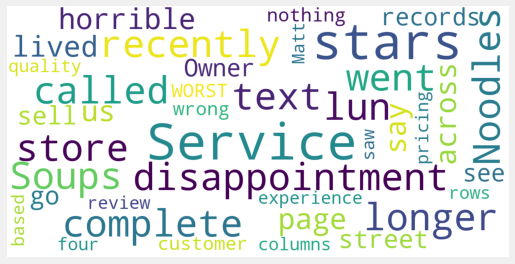

In [ ]:
most_used_words(graf_stars_1)

Las 100 palabras más usadas para comentarios con **2 Estrellas**

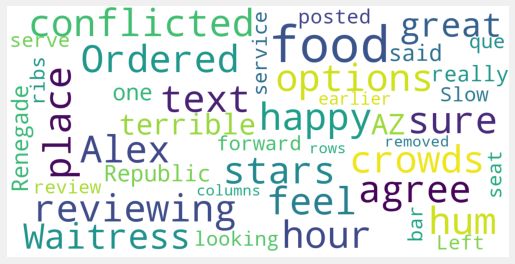

In [ ]:
most_used_words(graf_stars_2)

Las 100 palabras más usadas para comentarios con **3 Estrellas**

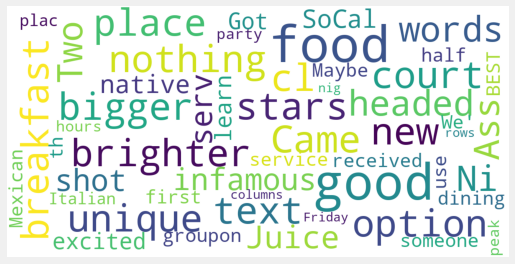

In [ ]:
most_used_words(graf_stars_3)

Las 100 palabras más usadas para comentarios con **4 Estrellas**

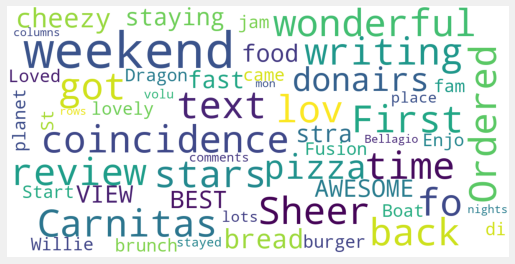

In [ ]:
most_used_words(graf_stars_4)

Las 100 palabras más usadas para comentarios con **5 Estrellas**

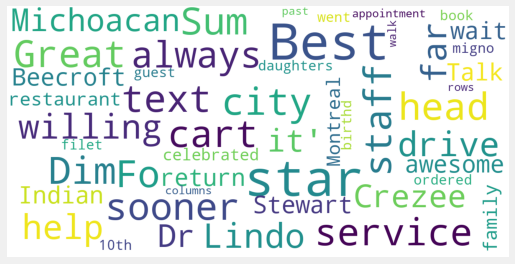

In [ ]:
most_used_words(graf_stars_5)

Observaciones sobre las nubes de palabras

Los clientes usaron las siguientes palabras para calificar sus reseñas: 
* 1 Estrella -> HORRIBLE, DECEPCION
* 2 Estrellas -> EN CONFLICTO, RENEGAR, LENTO
* 3 Estrellas -> NADA, COMIDA, INFAME
* 4 Estrellas -> REALMENTE, LUGAR, PEDIDO, BIEN, AGRADABLE
* 5 estrellas -> BUENO, ESTUPENDO, SIEMPRE, DISPUESTO

A partir de estas observaciones, encontramos que hay muchas palabras únicas en las reseñas, las cuales pueden resultar buenos clasificadores para ayudarnos a predecir la experiencia del cliente como POSITIVA ó NEGATIVA sobre un lugar/empresa. Por lo tanto, tomaremos la columna **TEXT** como variable independiente. 

## Relación entre la cantidad de Estrellas y los tipos de votación 

Hay 3 columnas de votación para las reseñas: 'useful', 'cool' ó 'funny'.

Ahora analisaremos si las cantidad de estrellas tienen alguna relación con los votos recibidos

In [ ]:
df_useful = df[['stars', 'useful']]
df_cool = df[['stars', 'cool']]
df_funny = df[['stars', 'funny']]

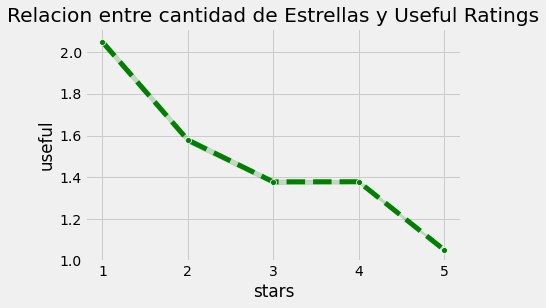

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.lineplot(x="stars", y="useful", data=df_useful, lw = 5, color = "green", linestyle = '--',marker = 'o')
ax.set_title('Relacion entre cantidad de Estrellas y Useful Ratings');

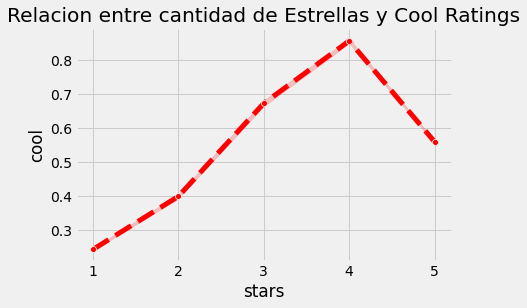

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.lineplot(x="stars", y="cool", data=df_cool, lw = 5, color = "red", linestyle = '--',marker = 'o')
ax.set_title('Relacion entre cantidad de Estrellas y Cool Ratings');

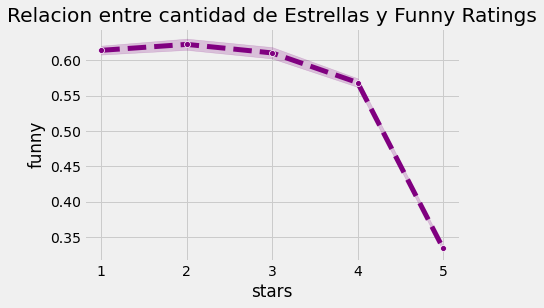

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.lineplot(x="stars", y="funny", data=df_funny, lw = 5, color = "purple", linestyle = '--',marker = 'o')
ax.set_title('Relacion entre cantidad de Estrellas y Funny Ratings');

Según los gráficos, se puede inferir que: 
1. Las reseñas que tienen una calificación baja (1-2 estrellas) se consideran más "útiles". 
2. Las calificaciones con 3 y 4 estrellas han sido votado como 'genial' 
3. Las calificaciones más bajas parecen haber sido votadas como "divertidas" en comparación con las reseñas con una calificación de estrellas más alta.  

### Valor medio y correlación entre los tipos de votación

A continuación veremos:
* Los valores medios con respecto a la cantidad de estrellas dadas a cada revisión
* La correlación entre los tipos de votación (cool, useful y funny) y la duracion de las reseñas

In [ ]:
media = df.groupby('stars').mean()
media

,cool,funny,useful,palabras_len,caracteres_len,ReviewType_2
stars,,,,,,
1,0.243,0.614,2.048,144.443,759.885,0.000
2,0.399,0.622,1.578,143.724,763.427,0.000
3,0.673,0.610,1.378,132.888,710.373,0.000
4,0.857,0.568,1.379,115.728,623.375,1.000
5,0.560,0.334,1.052,89.130,481.391,1.000


In [ ]:
media.corr()

,cool,funny,useful,palabras_len,caracteres_len,ReviewType_2
cool,1.000,-0.169,-0.681,-0.498,-0.469,0.622
funny,-0.169,1.000,0.713,0.935,0.945,-0.735
useful,-0.681,0.713,1.000,0.833,0.816,-0.677
palabras_len,-0.498,0.935,0.833,1.000,0.999,-0.893
caracteres_len,-0.469,0.945,0.816,0.999,1.000,-0.888
ReviewType_2,0.622,-0.735,-0.677,-0.893,-0.888,1.000


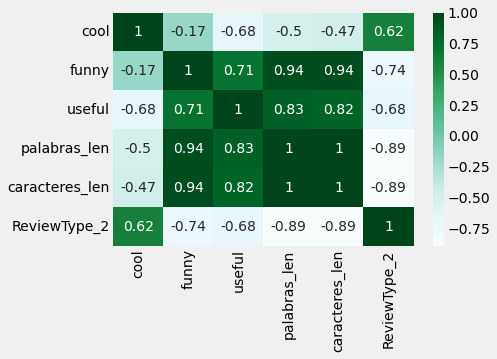

In [ ]:
sns.heatmap(media.corr(), annot=True, cmap='BuGn');

Podemos ver que existe una correlación negativa entre:
* Cool y Useful
* Cool y Funny
* Cool y longitud

Y tambien podemos ver que las reseñas marcadas como cool suelen ser breves,
considerando que, existe una correlación positiva entre:
* Funny y Useful    
* Funny y longitud
* Useful y longitud

Por lo tanto, podriamos concluir que las reseñas más largas suelen ser divertidas y útiles.

## Lugar con más comentarios

In [ ]:
business_agg=df.groupby('business_id').agg({'business_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [ ]:
business_agg=business_agg.sort_values([('business_id','count')],ascending=False)
print("          Lugares con más Comentarios (Top 5)  ")
business_agg.head(5)

          Lugares con más Comentarios (Top 5)  


business_id                 date  ...  cool stars
                             count                  min  ...   sum  mean
business_id                                              ...            
4JNXUYY8wbaaDmk3BPzlWw        4311  2005-12-02 16:15:33  ...  2298 4.134
RESDUcs7fIiihp38-d6_6g        4247  2012-09-10 20:03:19  ...  3337 3.775
K7lWdNUhCbcnEvI0NhGewg        3498  2010-12-18 03:07:06  ...  2820 3.675
f4x1YBxkLrZg652xt2KR5g        2928  2010-01-29 19:51:52  ...  1312 3.937
cYwJA2A6I12KNkm2rtXd5g        2749  2012-12-23 17:51:12  ...  1806 3.891

[5 rows x 7 columns]

In [ ]:
business_agg.iloc[0:5,0:1]

,business_id
,count
business_id,
4JNXUYY8wbaaDmk3BPzlWw,4311
RESDUcs7fIiihp38-d6_6g,4247
K7lWdNUhCbcnEvI0NhGewg,3498
f4x1YBxkLrZg652xt2KR5g,2928
cYwJA2A6I12KNkm2rtXd5g,2749


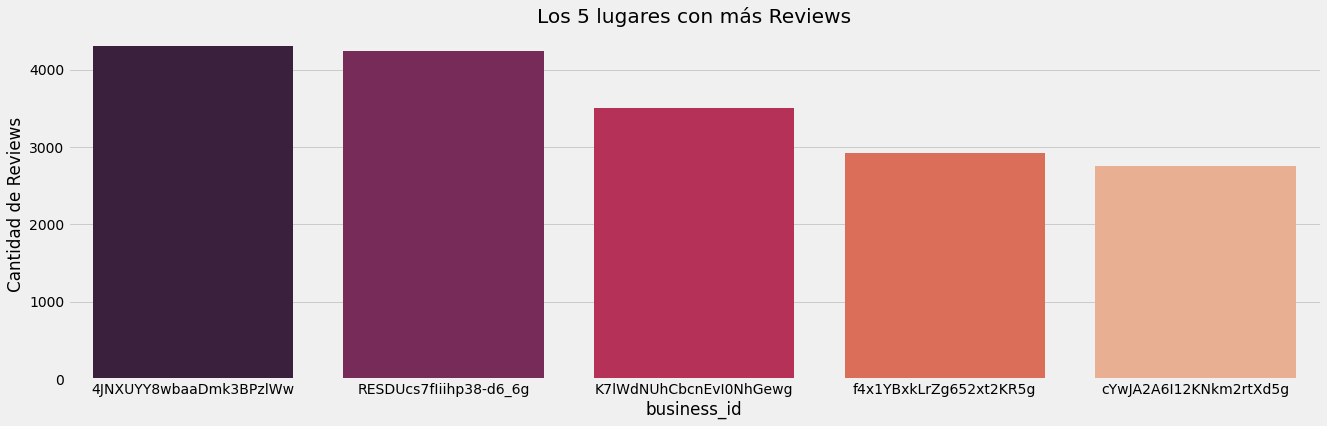

In [ ]:
x = ["4JNXUYY8wbaaDmk3BPzlWw","RESDUcs7fIiihp38-d6_6g","K7lWdNUhCbcnEvI0NhGewg","f4x1YBxkLrZg652xt2KR5g","cYwJA2A6I12KNkm2rtXd5g"]
y = [4311,4247,3498,2928,2749]
plt.figure(figsize=(20,6))
sns.barplot(x=x,y=y,palette="rocket")
plt.title("Los 5 lugares con más Reviews")
plt.xlabel ("business_id")
plt.ylabel("Cantidad de Reviews")
plt.show()

El lugar más comentado tiene 4311 opiniones y ha sido calificado con 4 estrellas (en promedio)

## Balanceo de los datos

Para trabajar con un analisis más polarizado, se eliminaran los comentarios con 3 estrellas, ya que como pudimos deducir a partir de la nube de palabras, el uso de 'no', 'nothing' y ‘problem’, muchas veces no significa algo negativo (por ejemplo si se comenta que no se ha tenido ningún problema con el lugar).  

Y por otro lado, se descarta realizar la predicción con el conjunto formado por 5 clases, ya que, para nuestro analisis es indistinto si la reseña es nueva (todas las reseñas comienzan con 0 votos) ó si tiene el número máximo de votos. En otras palabras, aunque pudieramos considerar un límite mínimo y máximo para la cantidad de votos que tengan los comentarios, dicho voto, es una calificación de la revisión en sí misma, NO es una calificación del lugar 

In [ ]:
df.drop(df[df["stars"]==3].index,inplace=True)

In [ ]:
df.stars.value_counts()

5    1467219
4     733911
1     501156
2     271259
Name: stars, dtype: int64

In [ ]:
# Dado que nuestras clases están muy desbalanceadas, vamos a hacerlas equivalentes para tener una distribución normal de las mismas.
# El principal problema con el "submuestreo aleatorio" es que corremos el riesgo de que nuestros modelos de clasificación no funcionen con la precisión que nos gustaría, ya que hay una gran pérdida de información 
df.ReviewType_2.value_counts()  

1    2201130
0     772415
Name: ReviewType_2, dtype: int64

In [ ]:
# Vamos a mezclar los datos antes de crear las submuestras
df = df.sample(frac=1)

In [ ]:
# tomamos igual cant de filas, para las 2 clases (proporcion 50/50)
negativos_df = df.loc[df['ReviewType_2'] == 0][:20000]
positivos_df = df.loc[df['ReviewType_2'] == 1][:20000]

normal_distributed_df = pd.concat([negativos_df, positivos_df])

# Mezclar las filas
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,cool,funny,stars,text,useful,palabras_len,caracteres_len,ReviewType_1,ReviewType_2
1024914,0,0,4,"As a local, it's a treat to have H&M. It's als...",0,77,388,Positivo,1
975789,0,0,1,"Over-priced, mediocre food and lousy service.\...",5,125,700,Negativo,0
188204,1,1,4,Most of the time I really love Señor Taco. The...,5,161,896,Positivo,1
1333675,0,0,1,"This was on the 10th of March, I was with comp...",0,164,843,Negativo,0
1239170,3,2,5,"I went into QMP expecting it to be good, but j...",4,206,1158,Positivo,1


In [ ]:
new_df.ReviewType_2.value_counts()

1    20000
0    20000
Name: ReviewType_2, dtype: int64

In [ ]:
# Se toma una pequeña muestra del dataset balanceado, para ver los tiempos de cpu
# con todo el dataset da error de RAM (hay que reiniciar todo el entorno de ejecucion) 
#reviews=new_df[:200000]
reviews=new_df
#reviews["labels"]= reviews["stars"].apply(lambda x: 1 if x > 3  else 0)
#reviews=reviews.drop("stars",axis=1)
reviews.reset_index(drop=True,inplace=True)
reviews.head()

,cool,funny,stars,text,useful,palabras_len,caracteres_len,ReviewType_1,ReviewType_2
0,0,0,4,"As a local, it's a treat to have H&M. It's als...",0,77,388,Positivo,1
1,0,0,1,"Over-priced, mediocre food and lousy service.\...",5,125,700,Negativo,0
2,1,1,4,Most of the time I really love Señor Taco. The...,5,161,896,Positivo,1
3,0,0,1,"This was on the 10th of March, I was with comp...",0,164,843,Negativo,0
4,3,2,5,"I went into QMP expecting it to be good, but j...",4,206,1158,Positivo,1


# Preprocesamiento para construir un “Bag of Words” (BoW) con Sci-kit Learn

---


## Eliminacion de ruido

---

Se realiza en dos pasos: 

1°) Se define una funcion para limpieza de texto donde lo que se hará será: 

* Eliminar caracteres especiales y signos de puntuación
* Poner el texto en minúscula
* Tokenizar el texto
* Quitar las palabras que contengan números
* Quitar las stop words
* Quitar los tokens vacíos
* Quitar las palabras con una letra

2°) Se detectan y eliminan/traducen las filas que estan en otro idioma



In [ ]:
def limpiar_texto(texto):   
    # Poner el texto en minúsculas
    texto = texto.lower()
    # Tokenizar el texto y quitar los signos de puntuación
    texto = [word.strip(string.punctuation) for word in texto.split(" ")]
    # Quitar las palabras que contengan números
    texto = [word for word in texto if not any(c.isdigit() for c in word)]
    # Quitar los tokens vacíos
    texto = [t for t in texto if len(t) > 0]
    # Pos tags
    pos_tags = pos_tag(texto)
    # Quitar las palabras con sólo una letra
    texto = [t for t in texto if len(t) > 1]
    # Unir todo
    texto = " ".join(texto)
    return(texto)

# Se aplica la función anterior a reviews.text
reviews['text'] = reviews['text'].progress_apply(lambda x: limpiar_texto(x))

Processing Dataframe: 100%|██████████| 40000/40000 [04:18<00:00, 154.77it/s]


## Proceso para Reviews en otro idioma

### Detección en la muestra 

In [ ]:
def detect_idioma(text):
   try:
       return detect(text)
   except:
       return 'unknown'

reviews['idioma'] = reviews['text'].apply(detect_idioma)

In [ ]:
reviews[['idioma']].value_counts()

idioma 
en         39829
fr           123
es            18
de             7
unknown        5
sv             2
ro             2
pt             2
ca             2
it             2
cy             1
da             1
id             1
tl             1
nl             1
no             1
pl             1
af             1
dtype: int64

In [ ]:
reviews[reviews.idioma=='unknown']['text']

In [ ]:
reviews[~reviews['idioma'].isin(['en'])]

In [ ]:
reviews.groupby([reviews['idioma'].isin(['en'])]).count()['text'] 

idioma
False       76
True     19922
Name: text, dtype: int64

Los False son los comentarios que **NO** estan en ingles, ó bien, no se les pudo identificar el idioma

### Eliminación de Reviews sin idioma

In [ ]:
# Eliminar solo los comentarios a los que no se pudo detectar el idioma
reviews.drop(reviews[reviews["idioma"]=='unknown'].index,inplace=True)

### Traducción de Reviews en otros idiomas

In [ ]:
def translation(data,col_idioma, col_text):
    #Seleccion de aquellos con idioma distinto a ingles
    df_languagues_no_en = data[data[col_idioma]!='en']
    #Traduccion al ingles
    trad = [itrans(elm, to_lang="en") for elm in df_languagues_no_en.text]

    #Reemplazo en el dataset original por los valores traducidos
    data.loc[df_languagues_no_en.index, col_text] = trad
    
    return data

reviews = translation(reviews,'idioma','text')

In [ ]:
reviews.drop(columns=['cool','funny','stars','useful','palabras_len','caracteres_len','idioma'], inplace=True)

# Guardado del archivo que usan los modelos

Este archivo .csv contiene los datos con las modificaciones del EDA, el balanceo y BoW

In [ ]:
reviews.to_csv('clear_reviews.csv',index=False, sep=';')

In [ ]:
reviews = pd.read_csv('./clear_reviews.csv',sep=';') 

In [ ]:
reviews.head()

,Unnamed: 0,text,ReviewType_1,ReviewType_2
0,0,as local it treat to have it also located in m...,Positivo,1
1,1,over priced mediocre food and lousy service my...,Negativo,0
2,2,most of the time really love se or taco the fo...,Positivo,1
3,3,this was on the th of march was with company o...,Negativo,0
4,4,went into qmp expecting it to be good but just...,Positivo,1


In [ ]:
reviews.head()

,ReviewType_1,ReviewType_2,text
0,Positivo,1,as local it treat to have it also located in m...
1,Negativo,0,over priced mediocre food and lousy service my...
2,Positivo,1,most of the time really love se or taco the fo...
3,Negativo,0,this was on the th of march was with company o...
4,Positivo,1,went into qmp expecting it to be good but just...


# Split Train and Test data


In [ ]:
X = reviews.text
y = reviews.ReviewType_2

In [ ]:
print(X.head())
print(y.head())

0    am not really barbecue fan but this place was ...
1    think that wine bar rocky river is experiencin...
2    don and his team have been amazing they are ve...
3    patient beware did routine check up with some ...
4    kept hearing so many awesome things about roll...
Name: text_procesados, dtype: object
0    1
1    0
2    1
3    0
4    1
Name: ReviewType_2, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape :",X_train.shape)
print("X_test shape  :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_tets shape  :",y_test.shape)

X_train shape : (31996,)
X_test shape  : (7999,)
y_train shape : (31996,)
y_tets shape  : (7999,)


In [ ]:
stop_words = stopwords.words('english') 

# Implementación de CountVectorizer

In [ ]:
vectorizer  = CountVectorizer(stop_words=stop_words)

In [ ]:
training_data = vectorizer.fit_transform(X_train) #lo entrena y devuelve la matriz

In [ ]:
testing_data = vectorizer.transform(X_test)

In [ ]:
vectorizer.vocabulary_ #traduccion a numero de cada palabra 

In [ ]:
len(vectorizer.vocabulary_) #longitud del vocabulario

44250

## Modelo Naive Bayes con CV

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(testing_data)

### Evaluación Modelo NB con CV

In [ ]:
accuracy_nb_cv = accuracy_score(y_test, predictions)
precision_nb_cv = precision_score(y_test, predictions)
recall_nb_cv = recall_score(y_test, predictions)
f1_nb_cv = f1_score(y_test, predictions)
print('Resultados NaiveBayes con CountVectorizer:')
print('-----------------------------------------')
print('Accuracy score NB con CV  : {:.2f}'.format(accuracy_nb_cv))
print('Precisión score NB con CV : {:.2f}'.format(precision_nb_cv))
print('Recall score NB con CV    : {:.2f}'.format(recall_nb_cv))
print('F1 score NB con CV        : {:.2f}'.format(f1_nb_cv))

Resultados NaiveBayes con CountVectorizer:
-----------------------------------------
Accuracy score NB con CV  : 0.88
Precisión score NB con CV : 0.86
Recall score NB con CV    : 0.90
F1 score NB con CV        : 0.88


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(13,7))
    lw = 2
    plt.plot([0,1], [0, 1], color='darkorange', linestyle='--')
    plt.plot(fpr, tpr, color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()

In [ ]:
probs=naive_bayes.predict_proba(testing_data)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)

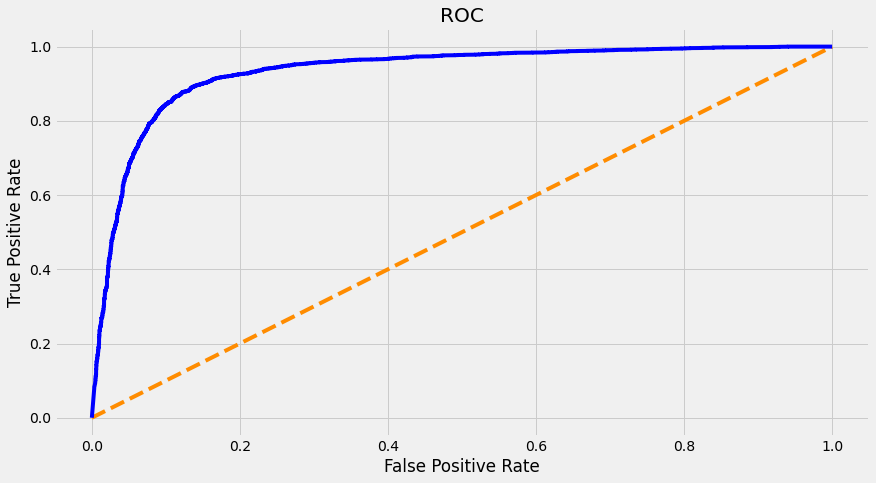

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
# Review Positiva NB con CV
pr = reviews['text'][0]
print(pr)
print("Actual Rating: ",reviews['ReviewType_2'][0])   
pr_t = vectorizer.transform([pr])
print("Predicted Rating:",naive_bayes.predict(pr_t)[0])

as local it treat to have it also located in my favorite shopping area town square ve been to the in hong kong this store is definitely smaller but still brings in lot of variety can complaint it great addition to basic stores like banana republic crew etc the staff can treat me as bad as they want am happy camper that this store is in town
Actual Rating:  1
Predicted Rating: 1


In [ ]:
# Review Negativa NB con CV
nr = reviews['text'][1]
print(nr)
print("Actual Rating: ",reviews['ReviewType_2'][1])
nr_t = vectorizer.transform([nr])
print("Predicted Rating:",naive_bayes.predict(nr_t)[0])

over priced mediocre food and lousy service my steak was dry and didn come with anything else other than lemon and decoration most of the waiters look like they hate their jobs thanked waiter for refilling my water glass and he grumbled very insincere you re welcome and yet another waiter dropped and broke glass object behind my sister terrifying her and my mother he then left it there and left without word no sorry or anything music is too darn loud came here to enjoy my dinner and company not having to yell to have conversation will certainly not be coming back could have eaten better food for cheaper price and better service elsewhere
Actual Rating:  0
Predicted Rating: 0


## Modelo KNN con CV

In [ ]:
KNN_pipeline = make_pipeline(KNeighborsClassifier())
KNN_params = {'kneighborsclassifier__n_neighbors': [10,12]} 
grid_KNN = GridSearchCV(KNN_pipeline, KNN_params)
grid_KNN.fit(training_data, y_train)
grid_KNN.score(training_data, y_train)

print("Best parameter (CV score=%0.3f):" % grid_KNN.best_score_)
print(grid_KNN.best_params_) 

Best parameter (CV score=0.724):
{'kneighborsclassifier__n_neighbors': 12}


In [ ]:
modelo_knn=KNeighborsClassifier(n_neighbors=12)
modelo_knn.fit(training_data, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
predictions = modelo_knn.predict(testing_data)

### Evaluación Modelo KNN con CV

In [ ]:
accuracy_knn_cv = accuracy_score(y_test, predictions)
precision_knn_cv = precision_score(y_test, predictions)
recall_knn_cv = recall_score(y_test, predictions)
f1_knn_cv = f1_score(y_test, predictions)
print('Resultados KNN con CountVectorizer:')
print('-----------------------------------')
print('Accuracy score NB con CV  : {:.2f}'.format(accuracy_knn_cv))
print('Precisión score NB con CV : {:.2f}'.format(precision_knn_cv))
print('Recall score NB con CV    : {:.2f}'.format(recall_knn_cv))
print('F1 score NB con CV        : {:.2f}'.format(f1_knn_cv))

Resultados KNN con CountVectorizer:
-----------------------------------
Accuracy score NB con CV  : 0.71
Precisión score NB con CV : 0.75
Recall score NB con CV    : 0.64
F1 score NB con CV        : 0.69


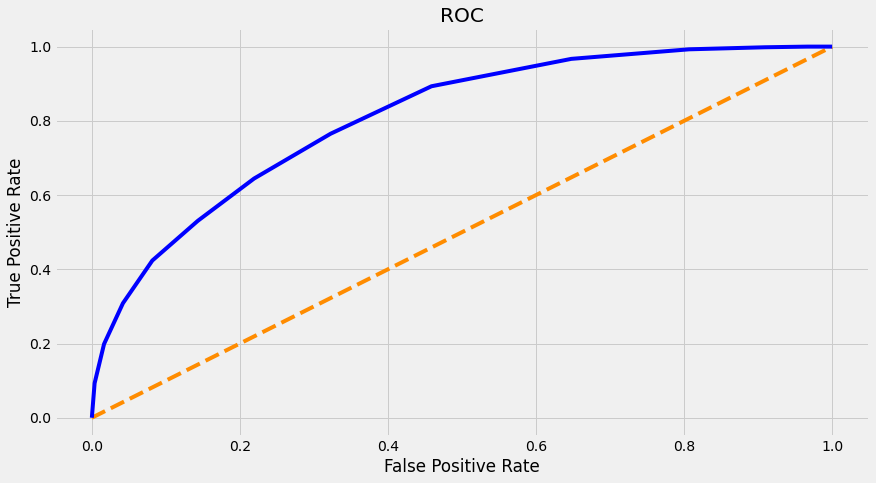

In [ ]:
probs=modelo_knn.predict_proba(testing_data)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [ ]:
# Review Positiva KNN con CV
pr = reviews['text'][0]
print(pr)
print("Actual Rating: ",reviews['ReviewType_2'][0])   
pr_t = vectorizer.transform([pr])
print("Predicted Rating:",modelo_knn.predict(pr_t)[0])

as local it treat to have it also located in my favorite shopping area town square ve been to the in hong kong this store is definitely smaller but still brings in lot of variety can complaint it great addition to basic stores like banana republic crew etc the staff can treat me as bad as they want am happy camper that this store is in town
Actual Rating:  1
Predicted Rating: 1


In [ ]:
# Review Negativa KNN con CV
nr = reviews['text'][1]
print(nr)
print("Actual Rating: ",reviews['ReviewType_2'][1])
nr_t = vectorizer.transform([nr])
print("Predicted Rating:",modelo_knn.predict(nr_t)[0])

over priced mediocre food and lousy service my steak was dry and didn come with anything else other than lemon and decoration most of the waiters look like they hate their jobs thanked waiter for refilling my water glass and he grumbled very insincere you re welcome and yet another waiter dropped and broke glass object behind my sister terrifying her and my mother he then left it there and left without word no sorry or anything music is too darn loud came here to enjoy my dinner and company not having to yell to have conversation will certainly not be coming back could have eaten better food for cheaper price and better service elsewhere
Actual Rating:  0
Predicted Rating: 0


In [ ]:
print('              TABLA COMPARATIVA')
print('------------------------------------------')

d = [ ["Accuracy score", accuracy_nb_cv, accuracy_knn_cv],
     ["Precisión score", precision_nb_cv, precision_knn_cv],
     ["Recall score", recall_nb_cv, recall_knn_cv],
     ["F1 score", f1_nb_cv, f1_knn_cv]]

print(tabulate(d, headers=["Metrica", "NB con CV", "KNN con CV"]))

              TABLA COMPARATIVA
------------------------------------------
Metrica            NB con CV    KNN con CV
---------------  -----------  ------------
Accuracy score      0.876985      0.712714
Precisión score     0.862575      0.746018
Recall score        0.896673      0.644483
F1 score            0.879293      0.691544


## Conclusión CountVectorizer

En función de los casos tomados como ejemplos para validar las predicciones **POSITIVAS** y **NEGATIVAS** en ambos algoritmos, el resultado fue acertado, pero teniendo en cuenta la totalidad de los datos considerados, el algoritmo de **NB** muestra mejor desempeño que el **KNN**, ya que tuvo mayores valores en sus metricas, además comparando los graficos de la Curva ROC, el primero, muestra que el area bajo la curva se acerca más a 1.

# Implementacion de TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

# Fit the training data and then return the matrix
training_data_tfidfVectorizer = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data_tfidfVectorizer  = tfidf_vectorizer.transform(X_test)

## Modelo NB con TV

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data_tfidfVectorizer, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(testing_data_tfidfVectorizer)

### Evaluación Modelo NB con TV

In [ ]:
accuracy_nb_tv = accuracy_score(y_test, predictions)
precision_nb_tv = precision_score(y_test, predictions)
recall_nb_tv = recall_score(y_test, predictions)
f1_nb_tv = f1_score(y_test, predictions)
print('Resultados NaiveBayes con TfidfVectorizer:')
print('-----------------------------------------')
print('Accuracy score NB con TV : {:.2f}'.format(accuracy_nb_tv))
print('Precisión score NB con TV: {:.2f}'.format(precision_nb_tv))
print('Recall score NB con TV   : {:.2f}'.format(recall_nb_tv))
print('F1 score NB con TV       : {:.2f}'.format(f1_nb_tv))

Resultados NaiveBayes con TfidfVectorizer:
-----------------------------------------
Accuracy score NB con TV : 0.89
Precisión score NB con TV: 0.90
Recall score NB con TV   : 0.87
F1 score NB con TV       : 0.89


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(13,7))
    lw = 2
    plt.plot([0,1], [0, 1], color='blue', linestyle='--')
    plt.plot(fpr, tpr, color='green')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()

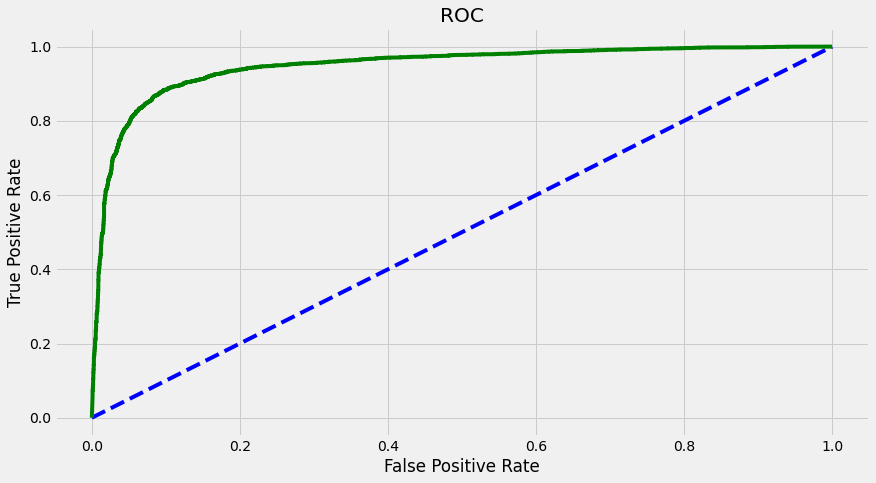

In [ ]:
probs=naive_bayes.predict_proba(testing_data)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [ ]:
# Review Positiva NB con TV
pr = reviews['text'][0]
print(pr)
print("Actual Rating: ",reviews['ReviewType_2'][0])   
pr_t = tfidf_vectorizer.transform([pr])  
print("Predicted Rating:",naive_bayes.predict(pr_t)[0])

as local it treat to have it also located in my favorite shopping area town square ve been to the in hong kong this store is definitely smaller but still brings in lot of variety can complaint it great addition to basic stores like banana republic crew etc the staff can treat me as bad as they want am happy camper that this store is in town
Actual Rating:  1
Predicted Rating: 1


In [ ]:
# Review Negativa NB con TV
nr = reviews['text'][1]
print(nr)
print("Actual Rating: ",reviews['ReviewType_2'][1])
nr_t = tfidf_vectorizer.transform([nr])
print("Predicted Rating:",naive_bayes.predict(nr_t)[0])

over priced mediocre food and lousy service my steak was dry and didn come with anything else other than lemon and decoration most of the waiters look like they hate their jobs thanked waiter for refilling my water glass and he grumbled very insincere you re welcome and yet another waiter dropped and broke glass object behind my sister terrifying her and my mother he then left it there and left without word no sorry or anything music is too darn loud came here to enjoy my dinner and company not having to yell to have conversation will certainly not be coming back could have eaten better food for cheaper price and better service elsewhere
Actual Rating:  0
Predicted Rating: 0


## Modelo KNN con TV

In [ ]:
KNN_pipeline = make_pipeline(KNeighborsClassifier())
KNN_params = {'kneighborsclassifier__n_neighbors': [10,12]}
             # 'kneighborsclassifier__weights': ['uniform', 'distance'],
             # 'kneighborsclassifier__metric': ['euclidean', 'manhattan']} 
grid_KNN = GridSearchCV(KNN_pipeline, KNN_params)
grid_KNN.fit(training_data_tfidfVectorizer, y_train)
grid_KNN.score(training_data_tfidfVectorizer, y_train)

print("Best parameter (CV score=%0.3f):" % grid_KNN.best_score_)
print(grid_KNN.best_params_) 

Best parameter (CV score=0.792):
{'kneighborsclassifier__n_neighbors': 12}


In [ ]:
modelo_knn=KNeighborsClassifier(n_neighbors=12)
modelo_knn.fit(training_data_tfidfVectorizer, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
predictions = modelo_knn.predict(testing_data_tfidfVectorizer)

### Evaluación Modelo KNN con TV

In [ ]:
accuracy_knn_tv = accuracy_score(y_test, predictions)
precision_knn_tv = precision_score(y_test, predictions)
recall_knn_tv = recall_score(y_test, predictions)
f1_knn_tv = f1_score(y_test, predictions)
print('Resultados KNN con TfidfVectorizer:')
print('----------------------------------')
print('Accuracy score KNN con TV : {:.2f}'.format(accuracy_knn_tv))
print('Precisión score KNN con TV: {:.2f}'.format(precision_knn_tv))
print('Recall score KNN con TV   : {:.2f}'.format(recall_knn_tv))
print('F1 score KNN con TV       : {:.2f}'.format(f1_knn_tv))

Resultados KNN con TfidfVectorizer:
----------------------------------
Accuracy score KNN con TV : 0.78
Precisión score KNN con TV: 0.83
Recall score KNN con TV   : 0.70
F1 score KNN con TV       : 0.76


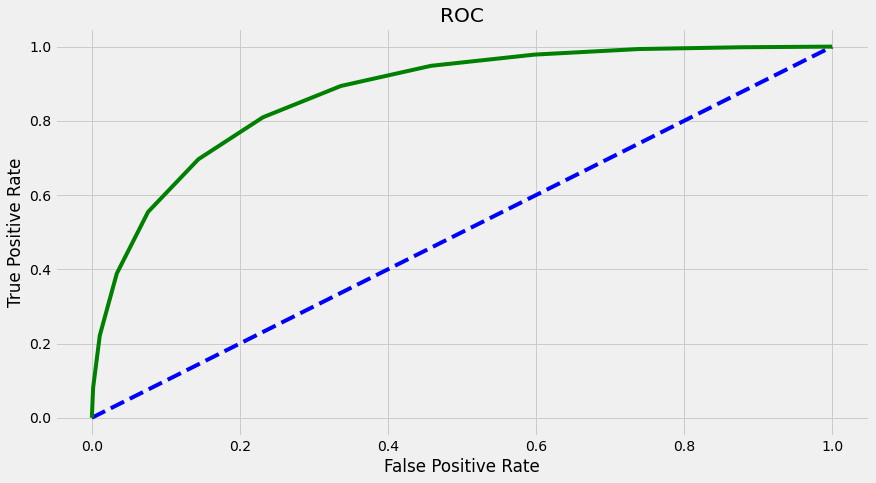

In [ ]:
probs=modelo_knn.predict_proba(testing_data_tfidfVectorizer)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [ ]:
# Review Positiva KNN con TV 
pr = reviews['text'][0]
print(pr)
print("Actual Rating: ",reviews['ReviewType_2'][0])   
pr_t = tfidf_vectorizer.transform([pr])
print("Predicted Rating:",modelo_knn.predict(pr_t)[0])

as local it treat to have it also located in my favorite shopping area town square ve been to the in hong kong this store is definitely smaller but still brings in lot of variety can complaint it great addition to basic stores like banana republic crew etc the staff can treat me as bad as they want am happy camper that this store is in town
Actual Rating:  1
Predicted Rating: 1


In [ ]:
# Review Negativa KNN con TV
nr = reviews['text'][1]
print(nr)
print("Actual Rating: ",reviews['ReviewType_2'][1])
nr_t = tfidf_vectorizer.transform([nr])
print("Predicted Rating:",modelo_knn.predict(nr_t)[0])

over priced mediocre food and lousy service my steak was dry and didn come with anything else other than lemon and decoration most of the waiters look like they hate their jobs thanked waiter for refilling my water glass and he grumbled very insincere you re welcome and yet another waiter dropped and broke glass object behind my sister terrifying her and my mother he then left it there and left without word no sorry or anything music is too darn loud came here to enjoy my dinner and company not having to yell to have conversation will certainly not be coming back could have eaten better food for cheaper price and better service elsewhere
Actual Rating:  0
Predicted Rating: 0


In [ ]:
print('              TABLA COMPARATIVA')
print('------------------------------------------')

d = [ ["Accuracy score", accuracy_nb_tv, accuracy_knn_tv],
     ["Precisión score", precision_nb_tv, precision_knn_tv],
     ["Recall score", recall_nb_tv, recall_knn_tv],
     ["F1 score", f1_nb_tv, f1_knn_tv]]

print(tabulate(d, headers=["Metrica", "NB con TV", "KNN con TV"]))

              TABLA COMPARATIVA
------------------------------------------
Metrica            NB con TV    KNN con TV
---------------  -----------  ------------
Accuracy score      0.887736      0.776347
Precisión score     0.902154      0.828571
Recall score        0.869652      0.696522
F1 score            0.885605      0.75683


## Conclusión TfidfVectorizer

Realizando el analisis de las palabras con sus ponderaciones, en la mayoria de las muestras tomadas al azar, la prediccion fue acertada y en los dos casos tomados como ejemplos, se muestra que hay coincidencia para ambos algoritmos, pero validando los resultados finales de cada modelo con sus metricas, el algoritmo de **NB** sigue mostrando mejor desempeño que el **KNN**.

# Implementacion de Embedding

In [ ]:
X_train.head()

5485     went here last night and it was pretty hot ins...
14857    visit here to meet my friend from new york but...
6897     chase field is great ballpark as an avid baseb...
17911    we were in vegas couple of weeks ago for semin...
39205    we are locals and we re excited to try this pl...
Name: text_procesados, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=5000) # solo se va a quedar con las 5mil palabras que más se repiten
tokenizer.fit_on_texts(X_train) #crea el word_index, se asigna un n° a cada palabra del vocabulario, deja la salida como un dict para cada palabra

X_train = tokenizer.texts_to_sequences(X_train) # transforma cada secuencia en un n° siguiendo los valores del word_index
X_test = tokenizer.texts_to_sequences(X_test)
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                           

# normalizar cada sentencia para que todas tengan la misma longitud, asi puedo definir la cant de n de entrada en la red neuronal
# rellena con un valor predeterminado las secuencias más cortas (por defecto con 0) y recorta las más largas a maxlen
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)  
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# caro
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/DiploCD/glove.6B.50d.txt.zip', 'r') as zipObj:  
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
# noe
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Modulo5/glove.6B.50d.txt.zip', 'r') as zipObj:  
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
# ceci
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Data Science/UTN Córdoba/Módulo 5/glove.6B.50d.txt.zip', 'r') as zipObj:  
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
def read_glove2dict(filepath):
    word_embedding_dict = dict()
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()  # Nice little trick to unpack the word and following embedding features
            values = np.array(vector, dtype=np.float32)
            word_embedding_dict[word] = values / np.linalg.norm(values)
    return word_embedding_dict

word_embedding_dict = read_glove2dict('/content/glove.6B.50d.txt')
word_embedding_dict['the'][:5]

array([ 0.08414141,  0.0502594 , -0.08301818,  0.02449763,  0.06950121],
      dtype=float32)

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
                                  
        return embedding_matrix

embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/glove.6B.50d.txt',       
                                            tokenizer.word_index,  
                                            embedding_dim)                                        

## Red Neuronal

In [ ]:
#EPOCHS = 10  # Número de iteraciones de entrenamiento
#BATCH_SIZE = 64  # Tamaño de grupos usados en entrenamiento
embedding_dim = 50 # Número de dimensiones de los embeddings GloVe
 
model = Sequential()

model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable=False))
model.add(layers.Conv1D(2, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/30
1000/1000 - 5s - loss: 0.6226 - accuracy: 0.6420 - val_loss: 0.5560 - val_accuracy: 0.7088
Epoch 2/30
1000/1000 - 4s - loss: 0.5285 - accuracy: 0.7350 - val_loss: 0.5278 - val_accuracy: 0.7323
Epoch 3/30
1000/1000 - 4s - loss: 0.5040 - accuracy: 0.7527 - val_loss: 0.5125 - val_accuracy: 0.7446
Epoch 4/30
1000/1000 - 4s - loss: 0.4936 - accuracy: 0.7602 - val_loss: 0.5084 - val_accuracy: 0.7472
Epoch 5/30
1000/1000 - 4s - loss: 0.4875 - accuracy: 0.7633 - val_loss: 0.5073 - val_accuracy: 0.7506
Epoch 6/30
1000/1000 - 4s - loss: 0.4828 - accuracy: 0.7676 - val_loss: 0.5044 - val_accuracy: 0.7491
Epoch 7/30
1000/1000 - 4s - loss: 0.4796 - accuracy: 0.7690 - val_loss: 0.5087 - val_accuracy: 0.7503
Epoch 8/30
1000/1000 - 4s - loss: 0.4789 - accuracy: 0.7701 - val_loss: 0.5019 - val_accuracy: 0.7536
Epoch 9/30
1000/1000 - 4s - loss: 0.4769 - accuracy: 0.7720 - val_loss: 0.5004 - val_accuracy: 0.7513
Epoch 10/30
1000/1000 - 4s - loss: 0.4753 - accuracy: 0.7737 - val_loss: 0.5004 - 

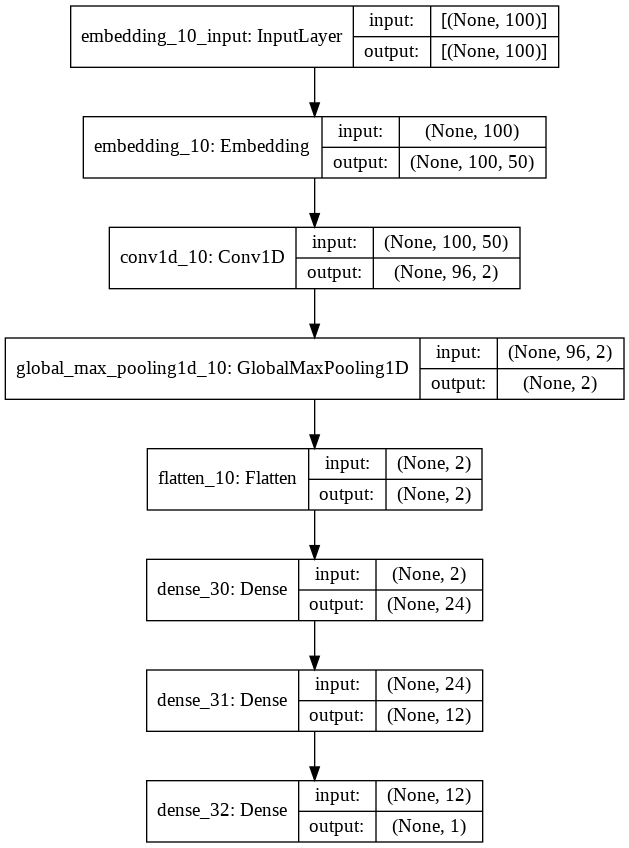

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def plot_results():
  plt.title('Loss / Binary_crossentropy')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='validation')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

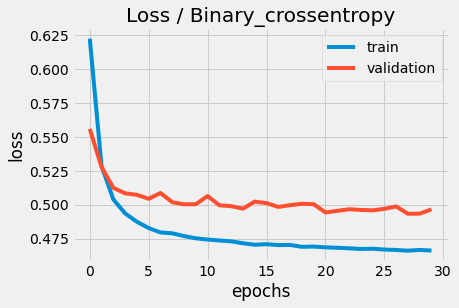

In [ ]:
plot_results()

In [ ]:
predictions = model.predict(X_test)
predictions = pd.DataFrame(predictions,columns=['pred'])
predictions.loc[predictions[predictions['pred']>=0.5].index] = 1
predictions.loc[predictions[predictions['pred']<0.5].index] = 0

In [ ]:
accuracy_rn = accuracy_score(y_test, predictions)
precision_rn = precision_score(y_test, predictions)
recall_rn = recall_score(y_test, predictions)
f1_rn = f1_score(y_test, predictions)
print('Resultados Red Neuronal:')
print('-----------------------------------------')
print('Accuracy score RN : {:.2f}'.format(accuracy_rn))
print('Precisión score RN: {:.2f}'.format(precision_rn))
print('Recall score RN   : {:.2f}'.format(recall_rn))
print('F1 score RN       : {:.2f}'.format(f1_rn))

Resultados Red Neuronal:
-----------------------------------------
Accuracy score RN : 0.76
Precisión score RN: 0.76
Recall score RN   : 0.77
F1 score RN       : 0.76


In [ ]:
#EPOCHS = 10  # Número de iteraciones de entrenamiento
#BATCH_SIZE = 64  # Tamaño de grupos usados en entrenamiento
embedding_dim = 50 # Número de dimensiones de los embeddings GloVe
 
model2 = Sequential()

model2.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable=False))
model2.add(layers.Conv1D(2, 5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Flatten())
#model2.add(layers.Dense(128, activation='relu'))
#model2.add(layers.Dense(48, activation='relu'))
model2.add(layers.Dense(64, activation='tanh'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(48, activation='tanh'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/30
1000/1000 - 5s - loss: 0.6333 - accuracy: 0.6375 - val_loss: 0.6094 - val_accuracy: 0.6741
Epoch 2/30
1000/1000 - 4s - loss: 0.5894 - accuracy: 0.6913 - val_loss: 0.5912 - val_accuracy: 0.6941
Epoch 3/30
1000/1000 - 4s - loss: 0.5685 - accuracy: 0.7108 - val_loss: 0.5721 - val_accuracy: 0.7081
Epoch 4/30
1000/1000 - 4s - loss: 0.5509 - accuracy: 0.7233 - val_loss: 0.5626 - val_accuracy: 0.7137
Epoch 5/30
1000/1000 - 4s - loss: 0.5419 - accuracy: 0.7291 - val_loss: 0.5581 - val_accuracy: 0.7196
Epoch 6/30
1000/1000 - 4s - loss: 0.5376 - accuracy: 0.7322 - val_loss: 0.5578 - val_accuracy: 0.7212
Epoch 7/30
1000/1000 - 4s - loss: 0.5329 - accuracy: 0.7376 - val_loss: 0.5496 - val_accuracy: 0.7268
Epoch 8/30
1000/1000 - 4s - loss: 0.5300 - accuracy: 0.7400 - val_loss: 0.5478 - val_accuracy: 0.7286
Epoch 9/30
1000/1000 - 4s - loss: 0.5283 - accuracy: 0.7411 - val_loss: 0.5435 - val_accuracy: 0.7318
Epoch 10/30
1000/1000 - 4s - loss: 0.5254 - accuracy: 0.7432 - val_loss: 0.5596 - 

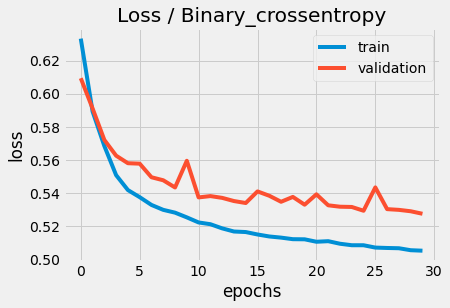

In [ ]:
plot_results()

In [ ]:
predictions = model2.predict(X_test)
predictions = pd.DataFrame(predictions,columns=['pred'])
predictions.loc[predictions[predictions['pred']>=0.5].index] = 1
predictions.loc[predictions[predictions['pred']<0.5].index] = 0

In [ ]:
predictions.to_numpy

In [ ]:
accuracy_rn_2 = accuracy_score(y_test, predictions)
precision_rn_2 = precision_score(y_test, predictions)
recall_rn_2 = recall_score(y_test, predictions)
f1_rn_2 = f1_score(y_test, predictions)
print('Resultados Red Neuronal:')
print('-----------------------------------------')
print('Accuracy score RN : {:.2f}'.format(accuracy_rn_2))
print('Precisión score RN: {:.2f}'.format(precision_rn_2))
print('Recall score RN   : {:.2f}'.format(recall_rn_2))
print('F1 score RN       : {:.2f}'.format(f1_rn_2))

Resultados Red Neuronal:
-----------------------------------------
Accuracy score RN : 0.74
Precisión score RN: 0.73
Recall score RN   : 0.76
F1 score RN       : 0.74


In [ ]:
#EPOCHS = 10  # Número de iteraciones de entrenamiento
#BATCH_SIZE = 64  # Tamaño de grupos usados en entrenamiento
embedding_dim = 50 # Número de dimensiones de los embeddings GloVe
 
model3 = Sequential()

model3.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen, trainable=False))
model3.add(layers.Conv1D(20, 5, activation='relu'))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(48, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model3.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/30
1000/1000 - 5s - loss: 0.5036 - accuracy: 0.7399 - val_loss: 0.4290 - val_accuracy: 0.7987
Epoch 2/30
1000/1000 - 4s - loss: 0.3654 - accuracy: 0.8344 - val_loss: 0.3906 - val_accuracy: 0.8234
Epoch 3/30
1000/1000 - 4s - loss: 0.3120 - accuracy: 0.8663 - val_loss: 0.3863 - val_accuracy: 0.8290
Epoch 4/30
1000/1000 - 4s - loss: 0.2833 - accuracy: 0.8794 - val_loss: 0.3724 - val_accuracy: 0.8345
Epoch 5/30
1000/1000 - 4s - loss: 0.2653 - accuracy: 0.8898 - val_loss: 0.3749 - val_accuracy: 0.8376
Epoch 6/30
1000/1000 - 4s - loss: 0.2467 - accuracy: 0.8986 - val_loss: 0.3758 - val_accuracy: 0.8374
Epoch 7/30
1000/1000 - 4s - loss: 0.2333 - accuracy: 0.9028 - val_loss: 0.3823 - val_accuracy: 0.8382
Epoch 8/30
1000/1000 - 4s - loss: 0.2237 - accuracy: 0.9078 - val_loss: 0.3913 - val_accuracy: 0.8394
Epoch 9/30
1000/1000 - 4s - loss: 0.2168 - accuracy: 0.9108 - val_loss: 0.3987 - val_accuracy: 0.8405
Epoch 10/30
1000/1000 - 4s - loss: 0.2071 - accuracy: 0.9172 - val_loss: 0.3934 - 

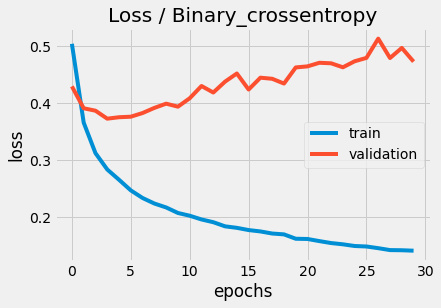

In [ ]:
plot_results()

In [ ]:
predictions = model3.predict(X_test)
predictions = pd.DataFrame(predictions,columns=['pred'])
predictions.loc[predictions[predictions['pred']>=0.5].index] = 1
predictions.loc[predictions[predictions['pred']<0.5].index] = 0

In [ ]:
accuracy_rn_3 = accuracy_score(y_test, predictions)
precision_rn_3 = precision_score(y_test, predictions)
recall_rn_3 = recall_score(y_test, predictions)
f1_rn_3 = f1_score(y_test, predictions)
print('Resultados Red Neuronal:')
print('-----------------------------------------')
print('Accuracy score RN : {:.2f}'.format(accuracy_rn_3))
print('Precisión score RN: {:.2f}'.format(precision_rn_3))
print('Recall score RN   : {:.2f}'.format(recall_rn_3))
print('F1 score RN       : {:.2f}'.format(f1_rn_3))

Resultados Red Neuronal:
-----------------------------------------
Accuracy score RN : 0.84
Precisión score RN: 0.84
Recall score RN   : 0.84
F1 score RN       : 0.84


In [ ]:
print('              TABLA COMPARATIVA')
print('------------------------------------------')

d = [ ["Accuracy score", accuracy_rn, accuracy_rn_2, accuracy_rn_3],
     ["Precisión score", precision_rn, precision_rn_2, precision_rn_3],
     ["Recall score", recall_rn, recall_rn_2, recall_rn_3],
     ["F1 score", f1_rn, f1_rn_2, f1_rn_3]]

print(tabulate(d, headers=["Metrica", "RN 1", "RN 2", "RN 3"]))

              TABLA COMPARATIVA
------------------------------------------
Metrica              RN 1      RN 2      RN 3
---------------  --------  --------  --------
Accuracy score   0.760595  0.736217  0.836355
Precisión score  0.755648  0.727404  0.836168
Recall score     0.769827  0.755066  0.836377
F1 score         0.762672  0.740977  0.836273


Se tomó la desición de usar la siguiente arquitectura para generar una red sencilla que permita verificar los resultados generales que se pueden tener de una apróximación con embedding para identificar las revisiones **POSITIVAS** y **NEGATIVAS**

* Se uso el algoritmo de optimización Adam, ya que permite mejorar los tiempos de procesamiento, manteniendo resultados aceptables. Además es fácil de implementar, computacionalmente eficiente y muy adecuado para problemas con grandes cantidades de datos.

* La función de perdida elegida fue la entropia cruzada pues es bastante recomendada para problemas de clasificación binaria. 

* El resultado con una capa convolucional para el modelo, brinda mejores resultados.

* Es posible mejorar los resultados al aumentar el tamaño de la muestra.

* Se observan mejores resultados, en relación al overfiting, con menor cantidad de filtros en la capa convolucional

Se selecciona el modelo 1 como modelo final de las tres redes neuronales por contar con mejor desempeño en el dataset de test en relación a los demás. Si bien el modelo 3 presenta mejores métricas, es notable que realiza overfiting de los datos en el gráfico del costo, ya que el error para el dato de validación aumenta demasiado en relación al dato de entrenamiento.

# Conclusiones

In [ ]:
print('              TABLA COMPARATIVA')
print('-----------------------------------------------------')

d = [ ["Accuracy score", accuracy_nb_tv, accuracy_nb_cv, accuracy_rn],
     ["Precisión score", precision_nb_tv, precision_nb_cv, precision_rn],
     ["Recall score", recall_nb_tv, recall_nb_cv, recall_rn],
     ["F1 score", f1_nb_tv, f1_nb_cv, f1_rn]]

print(tabulate(d, headers=["Metrica", "NB con TV", "NB con CV", "RN 1"]))

              TABLA COMPARATIVA
-----------------------------------------------------
Metrica            NB con TV    NB con CV      RN 1
---------------  -----------  -----------  --------
Accuracy score      0.887736     0.876985  0.760595
Precisión score     0.902154     0.862575  0.755648
Recall score        0.869652     0.896673  0.769827
F1 score            0.885605     0.879293  0.762672


El mejor desempeño se encuentra en el modelo de Naive Bayes entrenado con TFidfVectorizer.